### 24 Programming languages that pay top salaries

### Web Scraping - 

In [1]:
# importing the libraries

import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plot

In [2]:
# getting url
url ='https://content.techgig.com/technology/24-highest-paying-programming-languages-for-developers/articleshow/76243434.cms'

website = requests.get(url)
soup = BeautifulSoup(website.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html xmlns:str="http://exslt.org/strings">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   24 Programming languages that pay top salaries | TechGig
  </title>
  <link href="https://content.techgig.com/technology/24-highest-paying-programming-languages-for-developers/articleshow/76243434.cms" rel="canonical"/>
  <link href="https://content.techgig.com/technology/24-highest-paying-programming-languages-for-developers/amp_articleshow/76243434.cms" rel="amphtml"/>
  <meta content="Thursday, 05 May, 2022  03:22:04AM" http-equiv="Last-Modified"/>
  <meta content="Stack Overflow's latest update suggests that developers with skills in Scala, Go, Objective-C often take away biggest paychecks." name="description"/>
  <meta content="Top paying programming languages, Stack Overflow, popular programming languages, best programming language, 24 top paying programming languages" name="keywords"/>
  <meta name="twitter:card" value="summary_l

In [3]:
lst_language = [] # list for collecting languages names
Average_annual_salary = []  # list for collecting Average_annual_salary
for data in soup.find_all(["li","ol"]):
    if data.get_text().endswith('per annum'):
        lst_language.append(data.get_text().split()[0])
        # extracting numbers from data and replacing ',' from salary 
        Average_annual_salary.append(int(re.findall(r'[0-9]{2,3}\,[0-9]{3}',data.get_text())[0].replace(',','')))

In [4]:
# Creating dictionary for dataframe
language_salary ={'language':lst_language,'Average_annual_salary':Average_annual_salary}
language_salary

{'language': ['Scala',
  'Go',
  'Objective-C',
  'Kotlin',
  'Perl',
  'Ruby',
  'Rust',
  'C',
  'Swift',
  'Haskell',
  'Assembly',
  'Bash/Shell/PowerShell',
  'C++',
  'Java',
  'Python',
  'TypeScript',
  'JavaScript',
  'C#',
  'Dart',
  'HTML/CSS',
  'SQL',
  'R',
  'PHP',
  'VBA'],
 'Average_annual_salary': [150000,
  140000,
  135000,
  130000,
  130000,
  130000,
  130000,
  125000,
  125000,
  121000,
  120000,
  120000,
  120000,
  120000,
  120000,
  120000,
  112000,
  110000,
  110000,
  110000,
  110000,
  109000,
  100000,
  97000]}

In [5]:
# Creating Dataframe
df_language = pd.DataFrame(language_salary)
df_language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   language               24 non-null     object
 1   Average_annual_salary  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


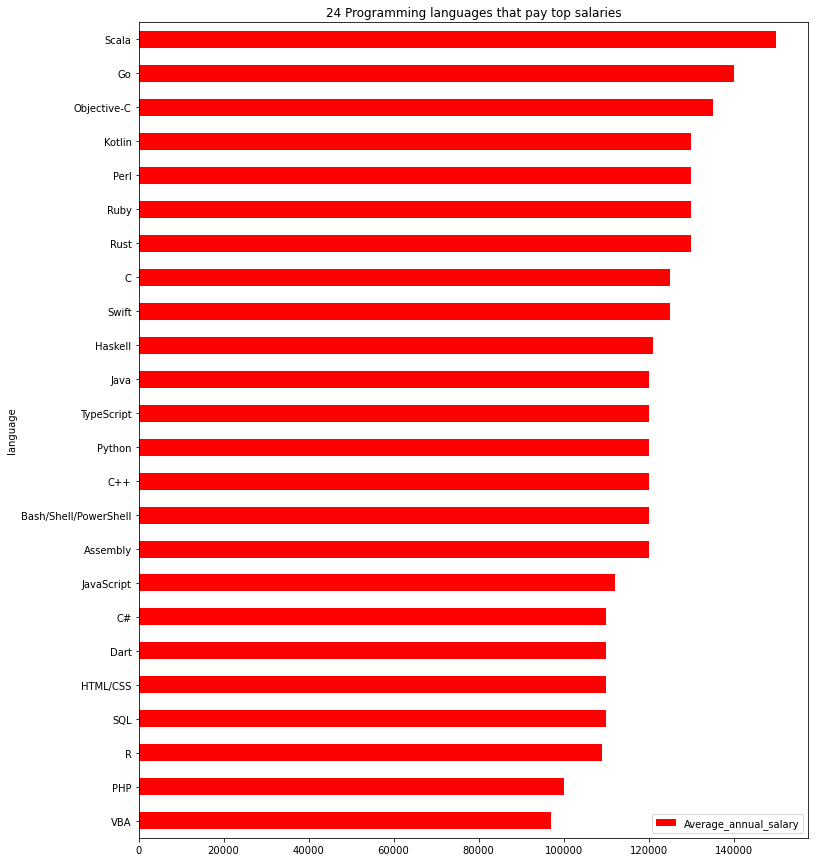

In [6]:
# Visualizing languages and Salary

df_language.sort_values(by=['Average_annual_salary'], inplace=True, ascending=False)

ax = df_language.plot.barh(x="language", y="Average_annual_salary", rot=0, title="24 Programming languages that pay top salaries", figsize = (12,15), color = 'red');
ax.invert_yaxis()
plot.show()
